In [2]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
from collections import Counter

In [4]:
print(tf.__version__)

2.0.0


In [5]:
fashion_dataset = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_dataset.load_data()

In [6]:
print(Counter(train_labels))

Counter({9: 6000, 0: 6000, 3: 6000, 2: 6000, 7: 6000, 5: 6000, 1: 6000, 6: 6000, 4: 6000, 8: 6000})


In [15]:
class_names = ['T-shirt/ Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


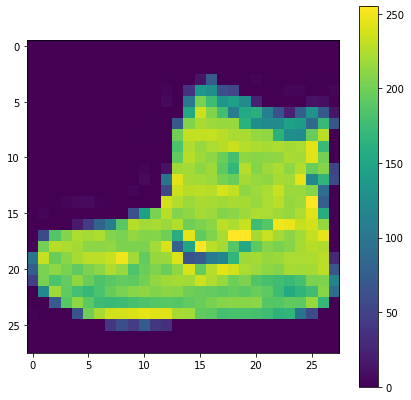

In [8]:
plt.figure(figsize=(7, 7))
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [12]:
# Data normalisation
train_data = train_images/255.0
test_data = test_images/255.0

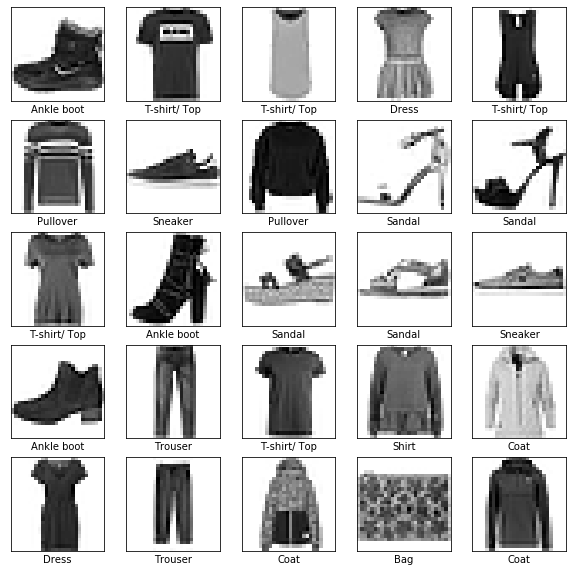

In [16]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()
    

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [21]:
model.fit(train_data, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.4789 - accuracy: 0.8264
Epoch 2/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.3622 - accuracy: 0.8666
Epoch 3/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.3269 - accuracy: 0.8785
Epoch 4/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.3046 - accuracy: 0.8861
Epoch 5/10
60000/60000 [==============================] - 10s 168us/step - loss: 0.2884 - accuracy: 0.8929
Epoch 6/10
60000/60000 [==============================] - 10s 168us/step - loss: 0.2722 - accuracy: 0.8976
Epoch 7/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.2579 - accuracy: 0.9031
Epoch 8/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.2469 - accuracy: 0.9069
Epoch 9/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.2380 - accuracy: 0.9094
Epoch 10/10
60000/60000 [============

In [23]:
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
print("Test accuracy: ", test_acc)

Test accuracy:  0.8841999769210815


In [24]:
predictions = model.predict(test_data)

In [25]:
predictions[0]

array([3.5150160e-07, 9.4262919e-07, 7.3346712e-08, 1.2736074e-08,
       5.0295323e-09, 3.6491160e-03, 2.4675991e-08, 1.3057815e-03,
       1.5996386e-08, 9.9504364e-01], dtype=float32)

In [28]:
np.argmax(predictions[0])

9

In [36]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
              color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

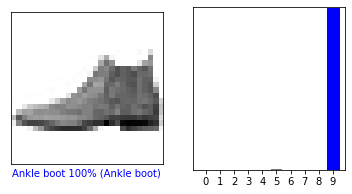

In [37]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()